In [2]:
import matplotlib.pyplot as plt

import numpy as np

from skimage import io
from skimage.feature import graycomatrix, graycoprops

from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

import os
from os import path
import math

In [3]:
# Load the CSV file into a DataFrame
df = pd.read_csv('Kmeans_2000.csv')

# Extract the file names from a specific column (assuming column name is 'file_name')
id_files = df['Eye ID'].tolist()
labels = df['Final Label'].tolist()

(1920, 2560, 3)


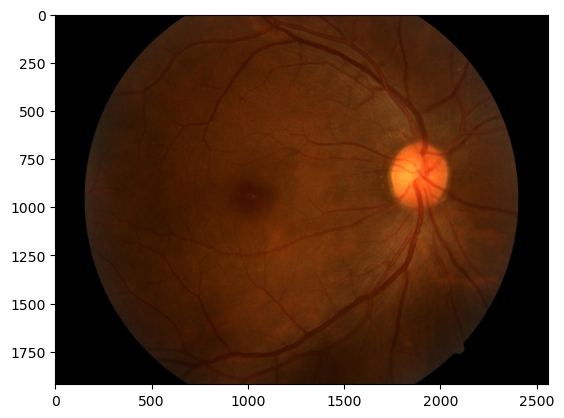

(numpy.ndarray, 255, 0, dtype('uint8'))

In [8]:
image = io.imread(id_files[0])
print(image.shape)
plt.imshow(image)
plt.show()

type(image), image.max(), image.min(), image.dtype

In [3]:
feature_set = ['energy', 'contrast', 'dissimilarity', 'homogeneity', 'ASM', 'correlation']

def compute_features(filenames):
    number_of_files = len(filenames)

    distances = [50, 100, 200, 300]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    property_size = len(distances) * len(angles)
    feature_size = property_size * len(feature_set)
    feature_all = np.zeros((number_of_files, feature_size))

    # Go through all the training images
    for i in range(number_of_files):
        #print('Analyzing image {}'.format(filenames[i]))
        im = io.imread(filenames[i])
        # Maximum intensity projection along the z-axis (axis=0)
        #image = im.max(axis=1)
        image = (im[:,:,0] + im[:,:,1] + im[:,:,2])/3
        image = image.astype(np.uint8)

        #comat = greycomatrix(image, , normed=True, symmetric=True)
        comat = graycomatrix(image, distances, angles, normed=True, symmetric=True)
        comat[0:5,0:5] = 0 # Remove background influence
        
        # 1. Include other measures
        # * energy
        # * contrast
        # * dissimilarity
        # * homogeneity
        # * ASM
        # * correlation
        feature = np.zeros((len(feature_set), property_size))
        for f in range(len(feature_set)):
            properties = graycoprops(comat, feature_set[f])
            # Apply simple normalization
            properties /= properties.max()
            feature[f] = properties.ravel()

        feature_all[i] = feature.ravel()
        
    return feature_all

In [4]:
def train(train, val, label_train, label_val):
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    
    X = compute_features(train)
    X_val = compute_features(val)
    for k in kernels:
        clf = SVC(gamma='auto', kernel=k)
        clf.fit(X, label_train)
    
        # Compute training accuracy
        y_pred = clf.predict(X)
        print('The training accuracy is using {} is: {}'.format(k, accuracy_score(label_train, y_pred)))
        
        print('We have {} validation images'.format(len(label_val)))
        pred_label = clf.predict(X_val)
        
        print('The validation accuracy is using {} is: {}'.format(k, accuracy_score(label_val, pred_label)))
        print('\n\n')

In [5]:
split_index = int(len(labels) * 0.8)

# Split the data into training and validation sets
label_train = labels[:split_index]
label_val = labels[split_index:]

In [6]:
files_train = id_files[:split_index]
files_val = id_files[split_index:]

In [7]:
train(files_train, files_val, label_train, label_val)

The training accuracy is using linear is: 0.55
We have 400 validation images
The validation accuracy is using linear is: 0.5175



The training accuracy is using poly is: 0.506875
We have 400 validation images
The validation accuracy is using poly is: 0.4725



The training accuracy is using rbf is: 0.52375
We have 400 validation images
The validation accuracy is using rbf is: 0.5275



The training accuracy is using sigmoid is: 0.506875
We have 400 validation images
The validation accuracy is using sigmoid is: 0.4725





In [1]:
print(label_val)

NameError: name 'label_val' is not defined